# 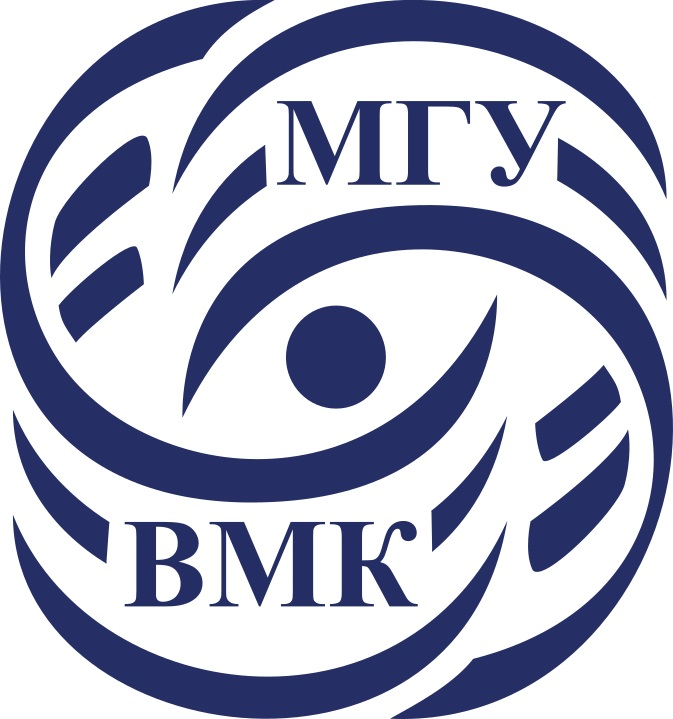

# Машинное обучение. ВМК МГУ

# Практическое задание 3: Линейные модели: регрессия

## Уровень: <font color='MediumSeaGreen'>**Исследовательский (Research)**</font>

# О формате сдачи

🔷 **<font color='plum'>При решении ноутбука используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, обычно помечаются фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличе работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, обычно помечаются фразами Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Обычно выводы подразумевают под собой текстовый ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

-----------
<font color="white" style="opacity:0.2025"></font>







Цель данного задания:

* Узнать, что такое переобучение и как с ним бороться в линейных моделях;
* Понять, чем отличаются разные регуляризаторы;
* Научиться решать задачу регрессии линейными моделями.
-------
<font color=DarkOrange>**Примерное время выполнения (execution time/время выполнения, если нажать run all) всех ячеек ноутбука при правильной реализации: 7 минут </font>**

# Подготовка рабочей среды

Сначала установим нужные нам версии библиотек. Мы гарантируем, что в данных версиях задание будет корректно отрабатывать.

После установки нужных версий, **возможно,** нужно перезагрузить среду (runtime), но скорее всего вам это не понадобится


На скачивание файла и установку понадобится не более 5 минут.

<font color='OrangeRed'>**Важно!**</font>

Устанавливать нужные версии нужно каждый раз, когда создается новый рантайм. Например, если вы 2 часа подряд делаете это задание, то подготовить библиотеки достаточно 1 раз. Но если вы, например, начали в понедельник, затем закрыли/выключили ноутбук, то при продолжении в среду, вам нужно будет запустить рантайм заново и следовательно заново установить библиотеки.

<font color='OrangeRed'>**Важно!**</font>
Если вы предпочитаете делать практические задания на своем личном ноутбуке, то проверьте, что вы установили рабочее окружение в [соответствии с гайдом](https://github.com/MSU-ML-COURSE/ML-COURSE-24-25/blob/main/tutorials/%D0%A2%D1%83%D1%82%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%20%D0%BF%D0%BE%20%D1%83%D1%81%D1%82%D0%B0%D0%BD%D0%BE%D0%B2%D0%BA%D0%B5%20%D1%80%D0%B0%D0%B1%D0%BE%D1%87%D0%B5%D0%B3%D0%BE%20%D0%BE%D0%BA%D1%80%D1%83%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B2%20Python%20%D0%B4%D0%BB%D1%8F%20%D1%80%D0%B5%D1%88%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%20(2).pdf)


In [1]:
! curl https://raw.githubusercontent.com/MSU-ML-COURSE/ML-COURSE-25-26/refs/heads/master/requirements/requirements.txt -o ./requirements_2025_26_for_colab_small.txt
! pip install -q -r ./requirements_2025_26_for_colab_small.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   360  100   360    0     0    278      0  0:00:01  0:00:01 --:--:--   278


Проверим версию библиотеки:

In [2]:
import catboost
assert(catboost.__version__ == '1.2.8')

Теперь можно приступать к выполнению задания! :)

-----------
<font color="white" style="opacity:0.2025"></font>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")
sns.set(style="darkgrid")
%matplotlib inline

## Линейная регрессия и регуляризация

Напомним, что линейная регрессия — это модель следующего вида: $$a(x) = \langle w, x \rangle + b$$ где $w \in \mathbb{R}^d$, $b \in \mathbb{R}$. Обучить линейную регрессию — значит найти $w$ и $b$.

В модели линейной регрессии с $l_2$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \frac{\alpha}{2} \cdot \left( w_1^2 + \dots + w_n^2 \right) \rightarrow \min_{w_1, \dots, w_n, b}$

В модели линейной регрессии с $l_1$ регуляризацией мы оптимизируем следующий функционал:

$\frac{1}{N} \cdot ∑_{i=1}^M (w_1 \cdot x_{i1} + \dots w_n \cdot x_{in} + b - y_i)^2 + \alpha \cdot \left( |w_1| + \dots + |w_n| \right) \rightarrow \min_{w_1, \dots, w_n, b}$

### <font color='DarkOrange'>**Задание 1 [1 балл]**</font>

Почему при обучении линейных моделей, коэффициент $b$ не регуляризуется? Дайте ответ с опорой на лекции. Возможно вам также поможет картика из базовой части

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Ответ: У коэффициента $b$ другой физический смысл, он соответствует не значимости какого-то из признаков, а среднему смещению данных относительно центра координат. Он не увеличивает размерность пространства решений, а значит не ухудшает качества модели. При заданных $w_1, \cdots, w_n$ коэффициент $b$ определяется однозначно.

-----
<font color="white" style="opacity:0.2025"></font>

Рассмотрим модель линейной регрессии с $l_2$ регуляризацией. В sklearn эта модель реализована посредством класса Ridge. В нём есть методы fit и predict. Первый принимает на вход обучающую выборку и вектор целевых переменных и обучает модель, второй, будучи вызванным после обучения модели, возвращает предсказание на выборке.

Сгенерируем случайные данные. Пусть $x$ будет обычным числом из равномерного распределения, а $𝑦=0.5 \cdot x + 0.1$ &mdash; целевая переменная. При этом наблюдаем мы $\overline{y} = y + \varepsilon,~\varepsilon \sim N(0, 0.01)$. Добавим в данные к переменной $x$ её же умноженную на $3$. То есть, теперь у нас два признака $x_1$ и $x_2 = 3 \cdot x_1$.

Поскольку  $y = c \cdot 0.5 \cdot x_1 + \frac{1 - c}{6} \cdot x_2 + 0.1$, где $c$ любое сколь угодно большое вещественное число. То, как мы могли убедиться в базовой части, без регуляризации есть риск выучить очень большие веса.

Посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [4]:
from sklearn.linear_model import Ridge

In [5]:
np.random.seed(1)
X = np.random.uniform(0, 1, 100)
Y = X * 0.5 + 0.1 + np.random.randn(100) * 0.1

X3 = np.hstack((X[:, None], 3 * X[:, None]))
Y3 = X3[:, 0] * 0.5 + 0.1 + np.random.randn(100) * 0.1

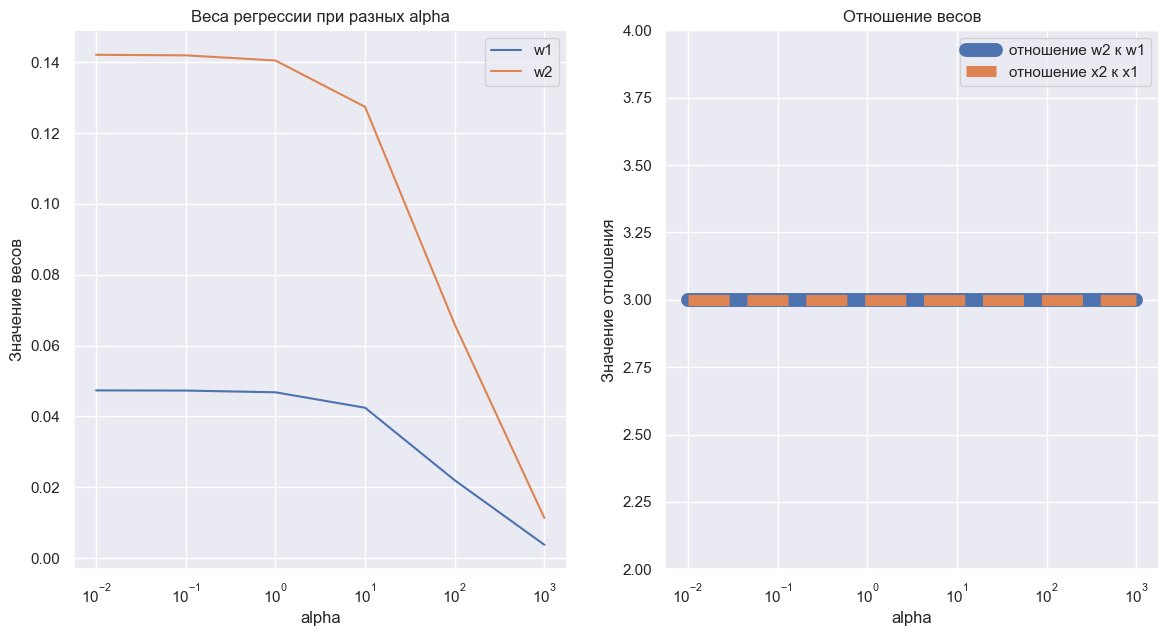

In [22]:
w1 = []
w2 = []

alphas = [0.01, 0.1, 1, 10, 100, 1000]

for alpha in alphas:
    reg = Ridge(alpha=alpha)
    reg.fit(X3, Y3)
    w1.append(reg.coef_[0])
    w2.append(reg.coef_[1])

w1 = np.array(w1)
w2 = np.array(w2)

fig, axs = plt.subplots(figsize=(14, 7), ncols=2)
axs[0].plot(alphas, w1, label="w1")
axs[0].plot(alphas, w2, label="w2")
axs[0].set_xscale("log")
axs[0].set_title("Веса регрессии при разных alpha")
axs[0].set_xlabel("alpha")
axs[0].set_ylabel("Значение весов")
axs[0].legend()
axs[1].plot(alphas, w2 / w1, label="отношение w2 к w1", linewidth=10)
axs[1].plot([0.01, 1000], [3, 3], label="отношение x2 к x1", linestyle="--", linewidth=8)
axs[1].set_xscale("log")
axs[1].set_ylim(2,4)
axs[1].set_xlabel("alpha")
axs[1].set_ylabel("Значение отношения")
axs[1].set_title("Отношение весов")
axs[1].legend()
plt.show()

### <font color='DarkOrange'>**Задание 2 [2 баллa]**</font>

Как думаете, почему отношение между весами постоянно? (подсказка, необходимо выписать функцию потерь и посчитать производные по весам)

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Ответ: распишем частные производные функции потерь по весам, заметим, что необходимым условием минимума исследуемого функционала $Q(w_1, w_2) = \sum \limits_{i = 1}^{n} (w_1x_{i1} + w_2x_{i2} + b - y_i)^2 + \frac{\alpha}{2}(w_1^2 + w_2^2)$  является равенство частных производных нулю:
$\frac{\partial Q}{\partial w_1} = \sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_1 + \alpha w_1 = 0$

$\frac{\partial Q}{\partial w_2} = \sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_2 + \alpha w_2 = 0$

Перенесём $\alpha w_1$ и $\alpha w_2$ врпаво и разделим одно на другое

$\sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_1 =  -\alpha w_1$

$\sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_2 = -\alpha w_2$

$\frac{x_1}{x_2} = \frac{w_1}{w_2}$

Заметим, что отношения равны, ч.т.д.

-----
<font color="white" style="opacity:0.2025"></font>

Заметим, что при $l_2$ регуляризации в данном примере веса получились пропорциональны значениям признаков. При этом, мы знаем, что оба признака взаимно однозначны, и прогноз можно делать только по одному из них. Для этого придумана $l_1$ регуляризация. В билиотеке sklearn линейная регрессия с $l_1$ регуляризацией реализована в классе Lasso

### <font color='DarkOrange'>**Задание 3 [2 баллa]**</font>

Почему в нашем примере $l_1$ регуляризация приведёт к разреживанию весов? (подсказка, нужно опять подсчитать производную, но обратите внимание на дифференцируемость модуля).

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Ответ: В этот раз будем дифференциировать следующий функционал $Q(w_1, w_2) = \sum \limits_{i = 1}^{n} (w_1x_{i1} + w_2x_{i2} + b - y_i)^2 + \frac{\alpha}{2}(w_1^2 + w_2^2)$ и приравняем частные производные к нулю.

$\frac{\partial Q}{\partial w_1} = \sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_1 + \alpha sgn(w_1) = 0$

$\frac{\partial Q}{\partial w_2} = \sum \limits_{i=1}^n (w_1x_{i1} + w_2x_{i2} + b - y_i)x_2 + \alpha sgn(w_2) = 0$

где $sgn$ $-$ функция знака.

Заметим, что если $w_i \neq 0$, то сумма должна быть $\pm \alpha$, а значит может не достигаться минимум функционала в другом уравнении, сумма будет стремиться к нулю при $w_i = 0$, поэтому $L_1$ регуляризация стремиться не просто уменьшить, а занулить некоторые веса.

При этом если $\alpha$ много больше суммы, то выгоднее минимизировать не сумму, а регуляризационный член, приравняв $w_i$  к нулю

-----

Добавим $l_1$ регуляризацию и посмотрим, как меняется значения весов, в зависимости от значения коэффициента регуляризации.

In [7]:
from sklearn.linear_model import Lasso

In [8]:
reg = Lasso(alpha=1., max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 1.")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.1, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.1")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.01, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.01")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.0001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.0001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

reg = Lasso(alpha=0.00001, max_iter=1000, tol=1e-4)
reg.fit(X3, Y3)
print("Веса, при alpha = 0.00001")
print("w1:", reg.coef_[0], "\tw2:", reg.coef_[1])
print()

Веса, при alpha = 1.
w1: 0.0 	w2: 0.0

Веса, при alpha = 0.1
w1: 0.0 	w2: 0.029684463509327023

Веса, при alpha = 0.01
w1: 0.0 	w2: 0.14506160917248503

Веса, при alpha = 0.001
w1: 0.0 	w2: 0.1565993237388008

Веса, при alpha = 0.0001
w1: 0.0 	w2: 0.1577530951954324

Веса, при alpha = 0.00001
w1: 0.3966873199145481 	w2: 0.025639365702912847



### <font color='DarkOrange'>**Задание 4 [2 баллa]**</font>

Почему в итоге при $\alpha = 0.00001$ получились веса не равные нулю?

<font color='LightSteelBlue'>**Подсказка**</font>

 Обратите внимание на то, каким странным получился вес $w_2$

<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Ответ: Регуляризация слишком слабая, чтобы занулить какой-то из весов. Ранее занулялся признак, дающий меньший вклад, то есть первый, так как его знячения меньше, оставался только второй признак и при уменьшении $\alpha$ значение $w_2$ росло, так как уменьшался штраф за регуляризацию. Но при $\alpha = 0.00001$ значение веса $w_2$ упало так как теперь оба признака участвуют в предсказании.

-----

В предущих блоках мы использовали модельные примеры, в которых $y$ зависел от $x$ линейно. Но так бывает далеко не всегда.

### <font color='DarkOrange'>**Задание 5 [1 баллa]**</font>

 Придумайте, сгенерируйте и визуализируйте пример, в котором линейная регрессия будет плохо классифицировать данные.

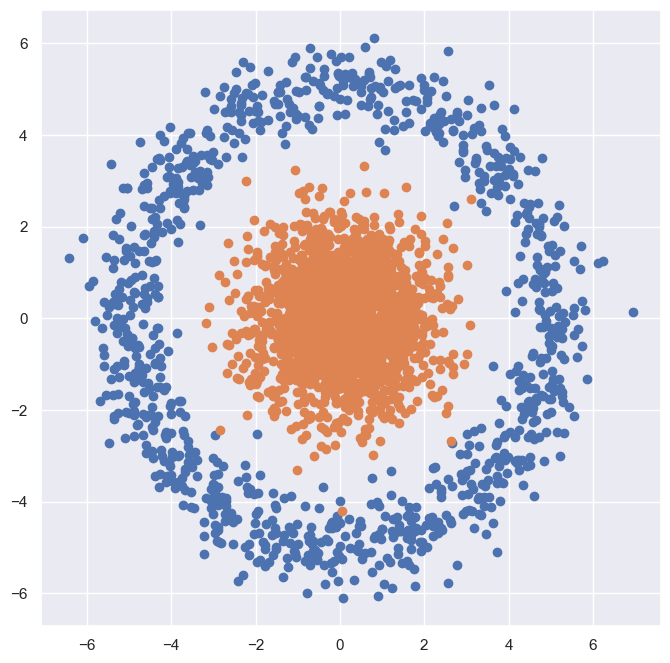

In [ ]:
import matplotlib.pyplot as plt

#внешнее кольцо

grid = np.random.uniform(0, 2 * np.pi, size = 1000)

X1_outer = np.sin(grid) * 5 + np.random.normal(scale=0.5, size = 1000)
X2_outer = np.cos(grid) * 5 + np.random.normal(scale=0.5, size = 1000)

plt.figure(figsize=(8, 8))
plt.scatter(X1_outer, X2_outer)

#внутренний "Круг"

X1_inner = np.random.normal(size = 2000);
X2_inner = np.random.normal(size = 2000);

plt.scatter(X1_inner, X2_inner)
plt.show()

### <font color='DarkOrange'>**Задание 6 [2 баллa]**</font>

Приведите искусственный пример (можно даже очень неправдоподобный), когда линейная регрессия с $l_2$ регуляризацией гарантированно занулит какой-нибудь признак? Покажите (теоретически или программно), что признак действительно зануляется


In [21]:
n_samples = 100
X_train_ex = np.random.uniform(size = n_samples).reshape(-1, 1)
y_train_ex = np.ones(n_samples).reshape(-1, 1)

reg = Ridge(alpha = 1)
reg.fit(X_train_ex, y_train_ex)
print(f"Coeff: {reg.coef_[0]}")

Coeff: 0.0


<font color='MediumOrchid'>**Ваши выводы тут:**</font>

Ответ: Сама $l_2$ регуляризация не будет способствовать занулению, значит надо чтобы самым отимальным значением веса при этом признаке был $0$, то есть признак должен иметь нулевую корреляцию с данными. Самым простым примером будут данные, где $y$ является константой. Что и показывает код выше.

**Выводы** В первой части задания по линейным моделям мы должны были узнать:
.

1.   Зачем нужна регуляризация.
2.   Как отбирать значащие признаки.
3.   Когда линейные модели работают хорошо, а когда плохо

-----
<font color="white" style="opacity:0.2025"></font>

Во **второй части** мы будем применять линейные модели для классификации реальных данных, где мы сможем проверить наши выводы, полученные на искуственных примерах. А также убедимся в полезности нормировки и научимся работать с разными видами данных.


Бесплатный мем для поднятия настроения

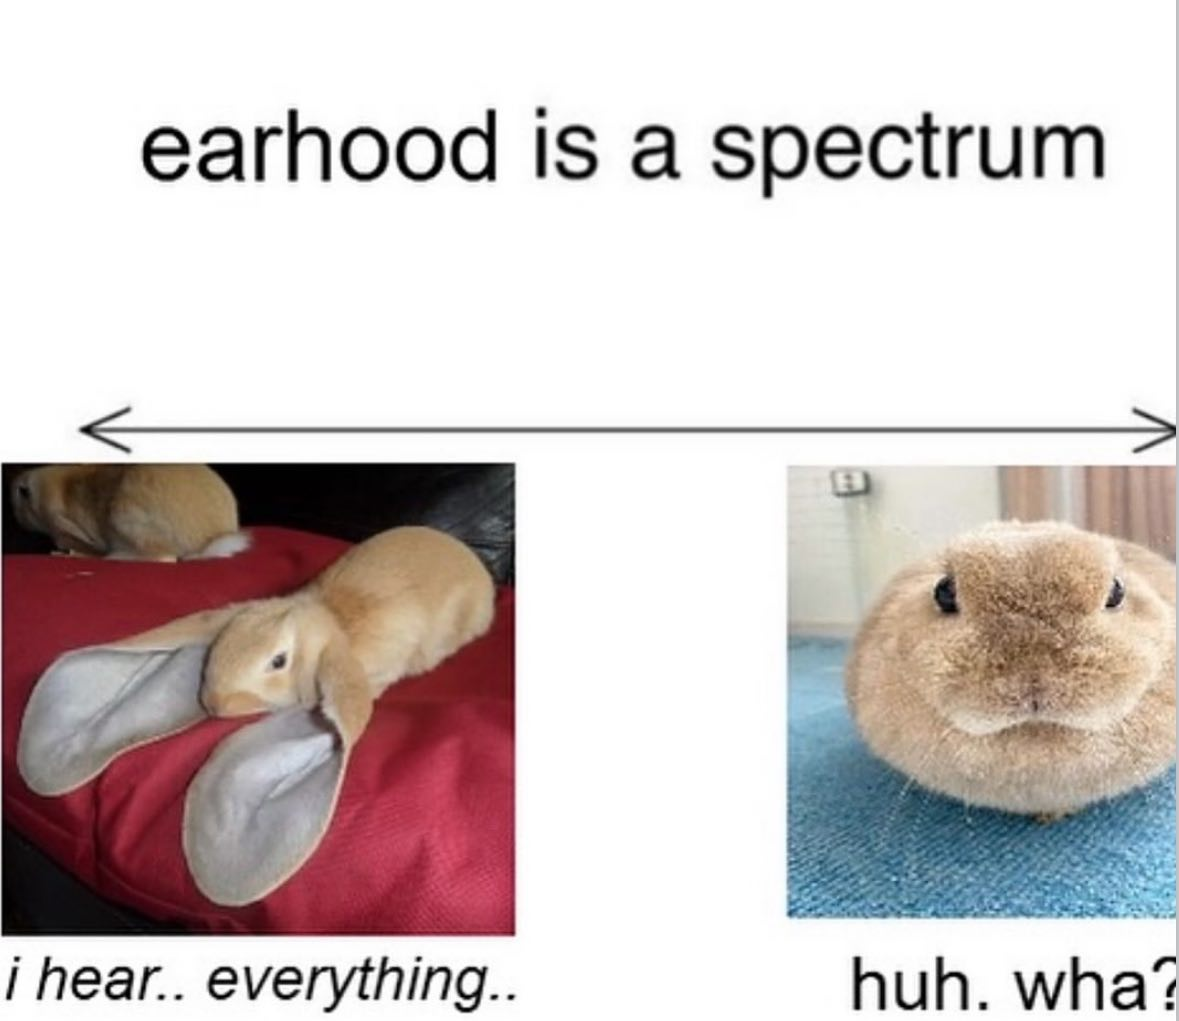